For quick access from GitHub, click the button:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mertalpt/Deepgame/blob/master/DeepGame.ipynb)



# Welcome to DeepGame

Following steps will take you through the usage and capabilities of DeepGame Cloud.

If this is your first time working with Google Colab, check out the [introduction](https://colab.research.google.com/notebooks/intro.ipynb).

In [1]:
#@title Install and Setup Dependencies

#@markdown Note that it will ask you to authenticate your Google account by providing a link and asking for a code.
#@markdown Click the link and follow the instructions to get the code and paste it to the input field.
#@markdown It does not access your Drive contents but checks whether you have access to a shared folder.

# Necessary for matplotlib to work in GPU mode
import matplotlib
%matplotlib inline

import os, sys, shutil

### Clone First Order Motion
if not os.path.exists('/content/first-order-model'):
  print('Cloning First Order Model...')
  !git clone --quiet https://github.com/AliaksandrSiarohin/first-order-model
  # Adding to path makes for easier imports
  sys.path.insert(1, '/content/first-order-model') 
  print('Done cloning First Order Model.')
else:
  if '/content/first-order-model' not in sys.path:
    sys.path.insert(1, '/content/first-order-model')
  print('First Order Model already exists.')

### Clone DeepGame
if not os.path.exists('/content/Deepgame'):
  print('Cloning Deepgame...')
  !git clone --quiet https://github.com/mertalpt/Deepgame.git
  # Adding to the path makes for easier imports
  sys.path.insert(2, '/content/Deepgame/deepgame-cloud')
  print('Done cloning Deepgame.')
  # Install dependencies
  print('Installing Deepgame\'s dependencies...')
  !pip install --quiet -r '/content/Deepgame/deepgame-cloud/requirements.txt'
  print('Done installing Deepgame\'s dependencies.')
else:
  if '/content/Deepgame/deepgame-cloud' not in sys.path:
    sys.path.insert(2, '/content/Deepgame/deepgame-cloud')
  print('Deepgame already exists.')

### Copy over data
data_path = '/content/data'
if not os.path.exists(data_path):
  print('Copying data from Drive.')
  from kora import drive
  folder_id = '1COKJuItmwH_GoBUTLXQiGq53OVm9PFKa'
  folder_name = drive.download_folder(folder_id)
  shutil.move('./{}'.format(folder_name), data_path)
  print('Done copying data from Drive.')
else:
  print('Drive data already exists.')

Cloning First Order Model...
Done cloning First Order Model.
Cloning Deepgame...
Done cloning Deepgame.
Installing Deepgame's dependencies...
     |████████████████████████████████| 163kB 18.1MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 61kB 204kB/s 
Done installing Deepgame's dependencies.
Copying data from Drive.
1o3T6l3VhfJT7_4551msjXItvOgyDS2wg checkpoints application/vnd.google-apps.folder (1/4)
13YwZVTANUYoAHwmQmDNhLTO7tF3k7rDq vox-adv-cpk.pth.tar application/x-tar (1/3)
Download 100%.
1-lZjY4Dcw1w4KYN4JZYEB5oPZS94HOu8 vox-adv-cpk.pth.tar application/x-tar (2/3)
100EoxITWwYZarlfygdNjxCP91gX0EOEz vox-cpk.pth.tar application/x-tar (3/3)
Download 100%.
1k_4EkMR_1EhVwusybXFJqU6_DzxTnwJQ config application/vnd.google-apps.folder (2/4)
1MuZuCamLdnQiuoHUGptCcUNKWbVE431f vox-256.yaml application/x-yaml (1/2)
Download 100%.
1yDTomSmI8ymFVcAxwN5B_vK04GVMDYDH vox-adv-256.yaml application/x-yaml (2/2)
Download 100%.
14WNk0E8iaCt3mykCCBsb

In [2]:
#@title Initialize Workspace
#@markdown First run may take over 5 minutes.

#@markdown ---

#@markdown Select a model to work with:

### Initialization of ImageAnimater
config_name = 'vox-adv-256' #@param ['vox-256', 'vox-adv-256'] {type: 'string'}
config_path = '{}/config/{}.yaml'.format(data_path, config_name)
# Deduce checkpoint file from the config
if config_name == 'vox-256':
  checkpoint_name = 'vox-cpk'
elif config_name == 'vox-adv-256':
  checkpoint_name = 'vox-adv-cpk'
else:
  raise ValueError('Unrecognized config name was input.')
checkpoint_path = '{}/checkpoints/{}.pth.tar'.format(data_path, checkpoint_name)
# Initialize ImageAnimater
print('Initializing Image Animater.')
from ImageAnimater import ImageAnimater
animater = ImageAnimater(config_path, checkpoint_path)
print('Done initializing Image Animater.')

### Initialization of StyleTransferer
# Cache ML model to avoid 5-10 minutes load time
# at each rerun
print('Initializing Style Transferer.')
from StyleTransferer import StyleTransferer
if '__module' in globals():
  style_transferer = StyleTransferer(__module)
else:
  style_transferer = StyleTransferer()
  __module = style_transferer.hub_module
print('Done initializing Style Transferer.')

Initializing Image Animater.
Done initializing Image Animater.
Initializing Style Transferer.
Loading module from TF Hub. This may take 5-10 minutes.
Done initializing Style Transferer.


Content image will be searched in /content/data/images/got-02.png.
Style image will be searched in /content/data/images/character-01.png.


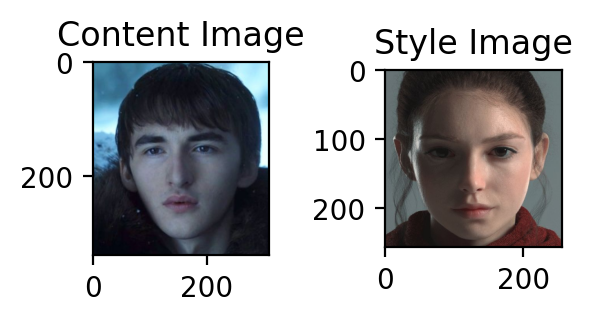

In [6]:
#@title Select Input Images

#@markdown ---
#@markdown ### Select image of the person to work on:
#@markdown You may enter a custom path.
content_image_path = 'got-02.png' #@param ['got-02.png', 'got-03.png', 'got-04.png', 'got-05.png', 'got-06.png', 'got-07.png', 'got-08.png'] {type: 'string', allow-input: true}
#@markdown Whether the input path is inside the common data path.
content_in_data_path = True #@param {type: 'boolean'}
content_path = '{}/images/{}'.format(data_path, content_image_path) if content_in_data_path else content_image_path
print('Content image will be searched in {}.'.format(content_path))

#@markdown ---
#@markdown ### Select a style image to use:
#@markdown You may enter a custom path.
style_image_path = 'character-01.png' #@param ['character-01.png', 'character-02.png'] {type: 'string', allow-input: true}
#@markdown Whether the input path is inside the common data path.
style_in_data_path = True #@param {type: 'boolean'}
style_path = '{}/images/{}'.format(data_path, style_image_path) if style_in_data_path else style_image_path
print('Style image will be searched in {}.'.format(style_path))

# Load images
from DGImage import DGImage
content_image = DGImage.from_path(content_path)
style_image = DGImage.from_path(style_path)

#@markdown ---
#@markdown ### Input Images Displayed:
%matplotlib inline
DGImage.display(content_image, style_image, titles=['Content Image', 'Style Image'])

In [5]:
#@title Select Input Video

#@markdown ---
#@markdown ### Select a driver video to animate images with:
#@markdown You may enter a custom path.
video_path = '00.mp4' #@param ['00.mp4', '04.mp4', '08.mp4', '10-backward.mp4', '10.mp4'] {type: 'string', allow-input: true}
#@markdown Whether the input path is inside the common data path.
video_in_data_path = True #@param {type: 'boolean'}
driver_video_path = '{}/videos/{}'.format(data_path, video_path) if video_in_data_path else video_path
print('The video will be searched in {}.'.format(driver_video_path))

# Load video
from DGVideo import DGVideo
driver_video = DGVideo.from_path(driver_video_path)

#@markdown ---
#@markdown ### Input Video Displayed:
from IPython.display import HTML
driver_anim = driver_video.animation(title='Driver Video')
HTML(driver_anim.to_html5_video())

The video will be searched in /content/data/videos/00.mp4.


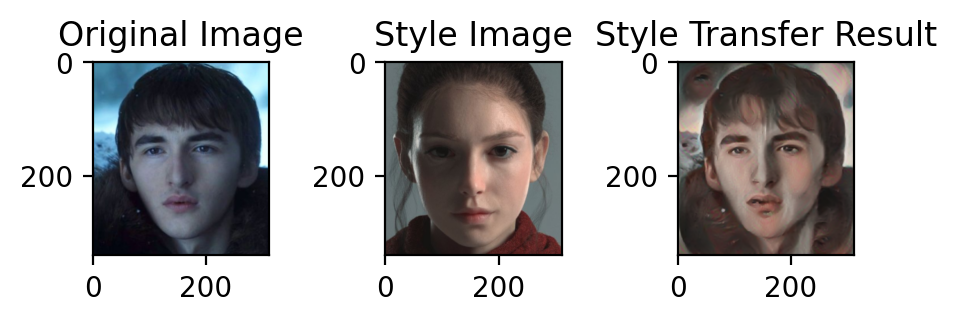

In [7]:
#@title Apply Style Transfer

styled_image = style_transferer.stylize(style_image, content_image)

# Resize the original to match the styled one
styled_shape = styled_image.shape()
content_image = content_image.resize(styled_shape[:2])
style_image = style_image.resize(styled_shape[:2])

#@markdown ---
#@markdown ### Result:
from DGImage import DGImage
DGImage.display(content_image, style_image, styled_image, 
                titles=['Original Image', 'Style Image', 'Style Transfer Result'])

### Construct a Mask for the Image

Unfortunately, this step requires human intervention. You are supposed to construct a mask that covers the background of an image. We will construct the mask on the original image, then apply the mask to the result of the style transfer. Constructing the mask directly on the result may work better in some cases.

Mask pieces can be constructed automatically or manually by inputting pixels on an image and marking whether to keep them. Refer to the *MaskOperations* class source code for better understanding.

We will feature the automatic construction here. 

Afterwards, you are supposed to use set operations *union, difference and intersection* included in the *MaskOperations* class to construct a mask.

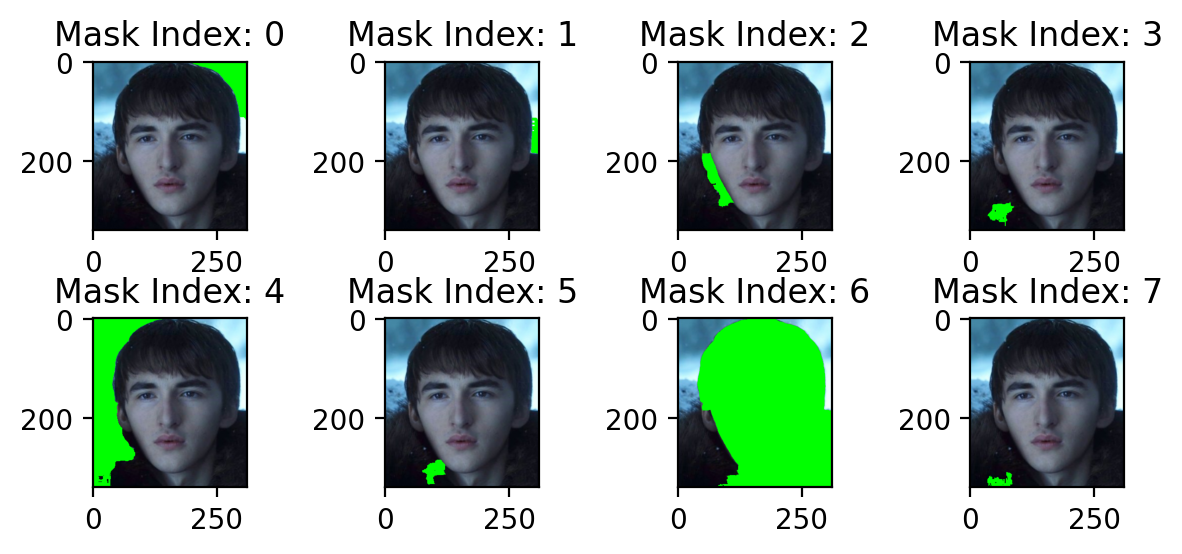

In [8]:
#@markdown ### Automatically Generated Mask Pieces

#@markdown ---

#@markdown How bright of pixels count for a segment of their own?
brightness_threshold = 0.98 #@param {type: 'slider', min: 0.0, max: 1.0, step: 0.01}

#@markdown ---

#@markdown How dark of pixels count for a segment of their own?
darkness_threshold = 0.02  #@param {type: 'slider', min: 0.0, max: 1.0, step: 0.01}

#@markdown ---

#@markdown How hard to blur edges when detecting contours?
sigma = 2.0 #@param {type: 'slider', min: 0.1, max: 5.0, step: 0.1}

#@markdown ---

#@markdown For which pixel count the segments should be filtered out?
size_filter = 200 #@param {type: 'integer'}

from MaskOperations import MaskOperations
masks = MaskOperations.generate(content_image,
                                light_mod=brightness_threshold,
                                dark_mod=darkness_threshold,
                                sigma=sigma,
                                size_lim=size_filter)

#@markdown ---
#@markdown ### Generated Pieces:
MaskOperations.display(content_image, masks)

Here, we apply set operations to construct the final mask. 

Do not run blindly, may not work for your inputs without changes.

Some notes about possible operations:

*    Union: Joins masks. Use 'MaskOperations.union(*masks)'.
*    Intersection: Takes common points of masks. Use 'MaskOperations.intersection(*masks)'.
*    Difference: Removes common points of two masks from the first one. Use 'MaskOperations.difference(mask_1, mask_2)'.
*    Negation: Flips the mask. Use '~mask', it is an operator that results in a flipped mask.

If you are patient, you can accumulate masks from different runs of the previous cell. That way you can fine tune your mask.

In [9]:
from MaskOperations import MaskOperations

final_mask = ~masks[6]

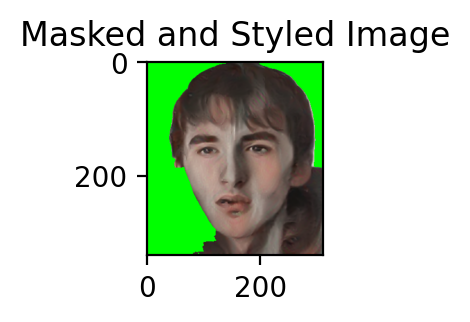

In [10]:
#@title Resulting Mask Applied
#@markdown Final mask is expected in a variable named 'final_mask'.

masked_image = MaskOperations.apply(styled_image, final_mask)

#@markdown ---

#@markdown ### Displayed:
from DGImage import DGImage
DGImage.display(masked_image, titles=['Masked and Styled Image'])

In [11]:
#@title Animate the Result

print('Animating...')
animated = animater.animate(driver=driver_video, target=masked_image)
print('Done.')

Animating...


  0%|          | 0/265 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|███

Done.


In [12]:
#@title Display the Result
#@markdown ---
from IPython.display import HTML
animation = animated.animation()
HTML(animation.to_html5_video())

In [13]:
#@title Save the Result

#@markdown ---

#@markdown Which format to save the files as?
output_format = '.mp4 File' #@param ['.mp4 File', 'Into a Directory with Frames Separated as PNG Images']

#@markdown ---

#@markdown Root directory to save the result in:
output_path = '/content/' #@param {type: 'string'}

#@markdown ---

#@markdown If format is mp4, will be the file name.

#@markdown If format is frames as PNGs, will be file name prefix.
file_name = 'result' #@param {type: 'string'}

print('Saving...')
import os
if output_format == '.mp4 File':
  result_path = '{}/{}.mp4'.format(output_path, file_name)
  if os.path.isdir(result_path):
    raise ValueError('Save path already exists as a directory.')
  animated.save(result_path)
else:
  if not os.path.exists(output_path):
    os.mkdir(output_path)
  elif os.path.isfile(output_path):
    raiseValueError('Save path already exists as a file.')
  animated.save_to_directory(output_path, prefix=file_name)

print('Done saving.')

Saving...
Done saving.


# Conclusion

Afterwards, you can download the mp4 file through Colab.

If you opted for frames as PNGs format, you can use the '!zip -r /path/to/output' command to zip the directory and download the zip itself.